In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from finance.science.dev import decisioner
from finance.utilities import utils

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#### Testing smoothing

In [3]:
d = decisioner.StockDecisioner(model_id='s0')
query = d.query
df = utils.query_db(query=query)

Smoothing first order differences


/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core

Calculating kelly criterion
Determining potential trades


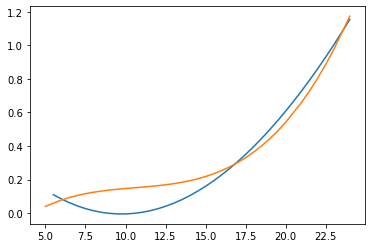

In [4]:
aa = x[x['symbol'] == 'AA']
days = aa['days_to_expiration'].unique()

plt.plot(aa.loc[aa['days_to_expiration']==days[3], 'strike'], aa.loc[aa['days_to_expiration']==days[3], 'smoothed_first_order_difference'])
plt.plot(aa.loc[aa['days_to_expiration']==days[7], 'strike'], aa.loc[aa['days_to_expiration']==days[7], 'smoothed_first_order_difference'])
plt.show()

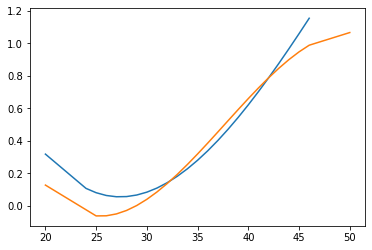

In [5]:
aa = x[x['symbol'] == 'AIG']
days = aa['days_to_expiration'].unique()

plt.plot(aa.loc[aa['days_to_expiration']==days[3], 'strike'], aa.loc[aa['days_to_expiration']==days[3], 'smoothed_first_order_difference'])
plt.plot(aa.loc[aa['days_to_expiration']==days[7], 'strike'], aa.loc[aa['days_to_expiration']==days[7], 'smoothed_first_order_difference'])
plt.show()

#### Testing kelly

In [6]:
d = decisioner.StockDecisioner(model_id='s0')
query = d.query
df = utils.query_db(query=query)
x = d.decision(df)

Smoothing first order differences


/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core/groupby/ops.py:213: RankWarning: Polyfit may be poorly conditioned
  res = f(group)
/home/user/miniconda/envs/py36/lib/python3.6/site-packages/pandas/core

Calculating kelly criterion
Determining potential trades


In [63]:
best_average_symbols = x.groupby('symbol')['kelly_criterion'].mean().nlargest(10).index
y = x[x['symbol'].isin(best_average_symbols)]

idx = y.groupby('symbol')['kelly_criterion'].transform(max) == y['kelly_criterion']
y[idx].nlargest(5, 'kelly_criterion')